In [27]:

import pandas as pd
pd.set_option('display.width', 10000)

df = pd.read_csv('chopin_winners.csv')
cl = pd.read_csv('cliburn_winners.csv')

print(df)
print(cl)


            year                                     1st                                       2nd                               3rd
0       I (1927)                 Lev Oborin Soviet Union               Stanisław Szpinalski Poland               Róża Etkin - Poland
1      II (1932)    Alexander Uninsky (c) - Soviet Union                  Imre Ungár (c) - Hungary             Bolesław Kon - Poland
2     III (1937)                Yakov Zak - Soviet Union             Rosa Tamarkina - Soviet Union       Witold Małcużyński - Poland
3      IV (1949)         Bella Davidovich - Soviet Union           Barbara Hesse-Bukowska - Poland     Waldemar Maciszewski - Poland
4            NaN  Halina Czerny-Stefańska - Poland (tie)                                       NaN                               NaN
5       V (1955)               Adam Harasiewicz - Poland         Vladimir Ashkenazy - Soviet Union                Fou Ts'ong - China
6      VI (1960)                Maurizio Pollini - Italy           Ir

In [28]:
def pivot(df):
    # Convert '1st', '2nd', '3rd' columns to string if not already
    df[["1st", "2nd", "3rd"]] = df[["1st", "2nd", "3rd"]].astype(str)
    
    
    # Melt the DataFrame to long format
    df_long = df.melt(id_vars=["year"], value_vars=["1st", "2nd", "3rd"], var_name="Position", value_name="Name_Country")
    
    # Add a 'Category' column for these competition events
    df_long['Category'] = 'Competition'
    
    # Convert 'Name_Country' to string if not already
    df_long["Name_Country"] = df_long["Name_Country"].astype(str)

    # Extract Name and Country
    df_long[["Name", "Country"]] = df_long["Name_Country"].str.extract(r"^(.*?) - (.*)$")

    # Drop the Name_Country column and remove rows with missing values
    df_long.drop("Name_Country", axis=1, inplace=True)

    # Remove rows with missing values
    df_long.dropna(inplace=True)

    # Extract the year
    df_long['year'] = df_long['year'].astype(str).str.extract(r'(\d{4})').astype(int)

    # Sort the DataFrame by year and Position
    df_long.sort_values(by=["year", "Position"], inplace=True)
    
    return df_long

dataframes = [df, cl]

# for each df in pivoted_dataframes, add a "Finals" column set to True
for df in pivoted_dataframes:
    df['Finals'] = True


# add an "event" column to each dataframe
pivoted_dataframes[0]['event'] = 'International Chopin Piano Competition'
pivoted_dataframes[1]['event'] = 'Van Cliburn International Piano Competition'

print(pivoted_dataframes)



[    year Position     Category                      Name           Country  Finals                                   event
46  1927      3rd  Competition                Róża Etkin            Poland    True  International Chopin Piano Competition
1   1932      1st  Competition     Alexander Uninsky (c)      Soviet Union    True  International Chopin Piano Competition
24  1932      2nd  Competition            Imre Ungár (c)           Hungary    True  International Chopin Piano Competition
47  1932      3rd  Competition              Bolesław Kon            Poland    True  International Chopin Piano Competition
2   1937      1st  Competition                 Yakov Zak      Soviet Union    True  International Chopin Piano Competition
25  1937      2nd  Competition            Rosa Tamarkina      Soviet Union    True  International Chopin Piano Competition
48  1937      3rd  Competition        Witold Małcużyński            Poland    True  International Chopin Piano Competition
3   1949      1

In [29]:
import gender_guesser.detector as gender
d = gender.Detector()

# Function to guess gender
def guess_gender(name):
    first_name = name.split()[0]
    return d.get_gender(first_name)

def apply_gender(df):
    # Apply the function to the 'Name' column
    df['Gender'] = df['Name'].apply(lambda x: guess_gender(x) if pd.notnull(x) else None)


[apply_gender(df) for df in pivoted_dataframes]
combined = pd.concat([pivoted_dataframes[0], pivoted_dataframes[1]])

combined.to_csv('combined.csv', index=False)




In [30]:
import pandas as pd
import tabulate as tab
pd.set_option('display.max_rows', None)

combined = pd.read_csv('combined.csv')
print(combined)

    year Position     Category                      Name           Country  Finals                                        event       Gender
0   1927      3rd  Competition                Róża Etkin            Poland    True       International Chopin Piano Competition       female
1   1932      1st  Competition     Alexander Uninsky (c)      Soviet Union    True       International Chopin Piano Competition         male
2   1932      2nd  Competition            Imre Ungár (c)           Hungary    True       International Chopin Piano Competition         male
3   1932      3rd  Competition              Bolesław Kon            Poland    True       International Chopin Piano Competition         male
4   1937      1st  Competition                 Yakov Zak      Soviet Union    True       International Chopin Piano Competition         male
5   1937      2nd  Competition            Rosa Tamarkina      Soviet Union    True       International Chopin Piano Competition       female
6   1937     

In [31]:
# getting gender distributions
gender_counts = combined['Gender'].value_counts()
print(gender_counts)


Gender
male           61
female         22
unknown        11
andy            3
mostly_male     1
Name: count, dtype: int64


Country
Soviet Union     16
United States    14
Poland           11
Russia            9
South Korea       6
Japan             5
Italy             5
Brazil            4
France            4
China             4
Name: count, dtype: int64


/tmp/ipykernel_174632/2377613649.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


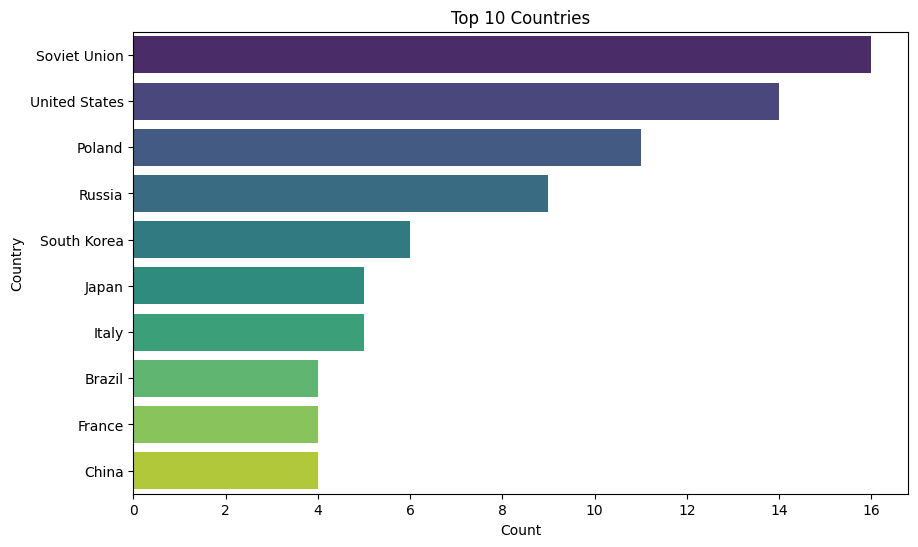

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# getting top 10 countries
top_countries = combined['Country'].value_counts().head(10)
print(top_countries)

# Plotting the top 10 countries
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()




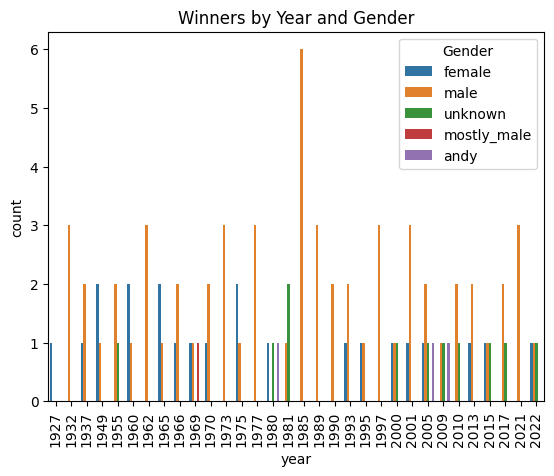

In [33]:
sns.countplot(data=combined, x='year', hue='Gender')
plt.xticks(rotation=90)
plt.title('Winners by Year and Gender')
plt.show()


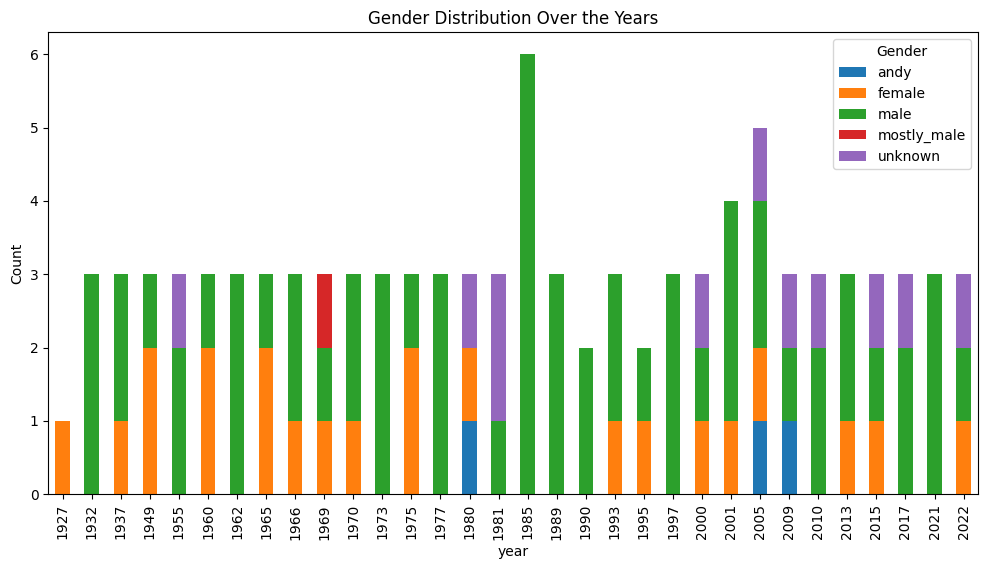

In [34]:
gender_year = combined.groupby(['year', 'Gender']).size().unstack().fillna(0)
gender_year.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Gender Distribution Over the Years')
plt.ylabel('Count')
plt.show()


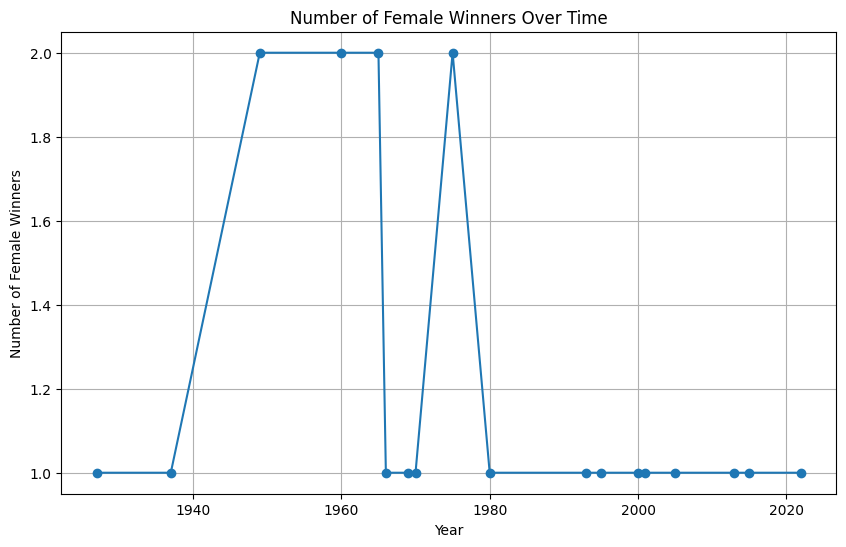

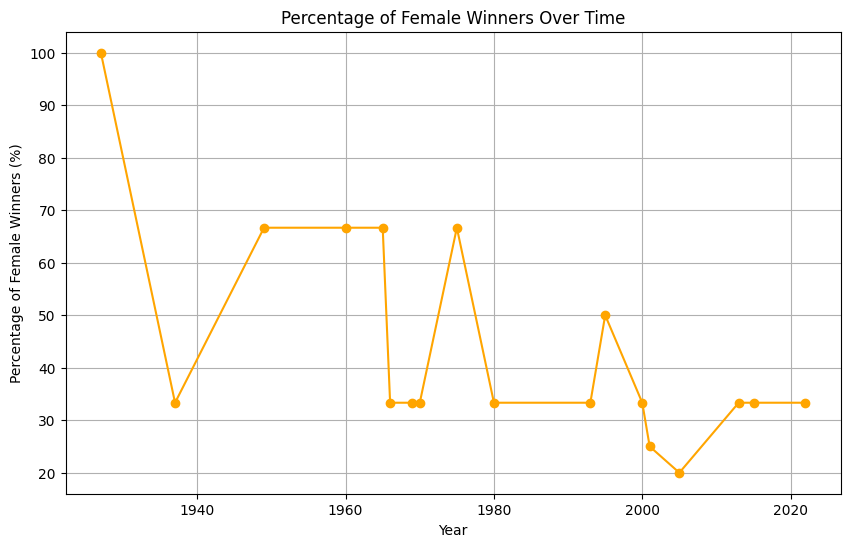

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'combined'
female_winners = combined[combined['Gender'] == 'female'].groupby('year').size().reset_index(name='female_count')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(female_winners['year'], female_winners['female_count'], marker='o')
plt.title('Number of Female Winners Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Female Winners')
plt.grid(True)
plt.show()


# Count total winners per year
total_winners = combined.groupby('year').size().reset_index(name='total_count')

# Merge with female count
merged = pd.merge(female_winners, total_winners, on='year')
merged['female_percentage'] = (merged['female_count'] / merged['total_count']) * 100

# Plot percentage
plt.figure(figsize=(10, 6))
plt.plot(merged['year'], merged['female_percentage'], marker='o', color='orange')
plt.title('Percentage of Female Winners Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Female Winners (%)')
plt.grid(True)
plt.show()


In [36]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(merged['year'], merged['female_percentage'])

print(f"Slope: {slope:.4f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("There is a statistically significant trend in female winners over time.")
else:
    print("No statistically significant trend detected.")


Slope: -0.4896, p-value: 0.0039
There is a statistically significant trend in female winners over time.
